In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.model_selection import train_test_split
import feature_engine.transformation as vt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

In [85]:
data_fifa = pd.read_csv('fifa_cleaned.csv')

In [86]:
data_fifa.isnull().sum()

age                               0
height_cm                         0
weight_kg                         0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
preferred_foot                    0
weak_foot                         0
skill_moves                       0
work_rate                         0
team_position                     0
gk_diving                         0
gk_handling                       0
gk_kicking                        0
gk_reflexes                       0
attacking_crossing                0
attacking_finishing               0
attacking_heading_accuracy        0
attacking_short_passing           0
attacking_volleys                 0
skill_dribbling                   0
skill_curve                       0
skill_fk_accuracy                 0
skill_long_passing                0
skill_ball_control                0
movement_acceleration             0
movement_sprint_speed       

In [87]:
data_fifa.dtypes

age                             int64
height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
preferred_foot                  int64
weak_foot                       int64
skill_moves                     int64
work_rate                      object
team_position                  object
gk_diving                     float64
gk_handling                   float64
gk_kicking                    float64
gk_reflexes                   float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve                     int64
skill_fk_accuracy               int64
skill_long_passing              int64
skill_ball_control              int64
movement_acc

##### We can see that there are 2 features work_rate and team_position which are in object dtype which are categorical. So we will need to encode these categorical variables into computer understandable format.

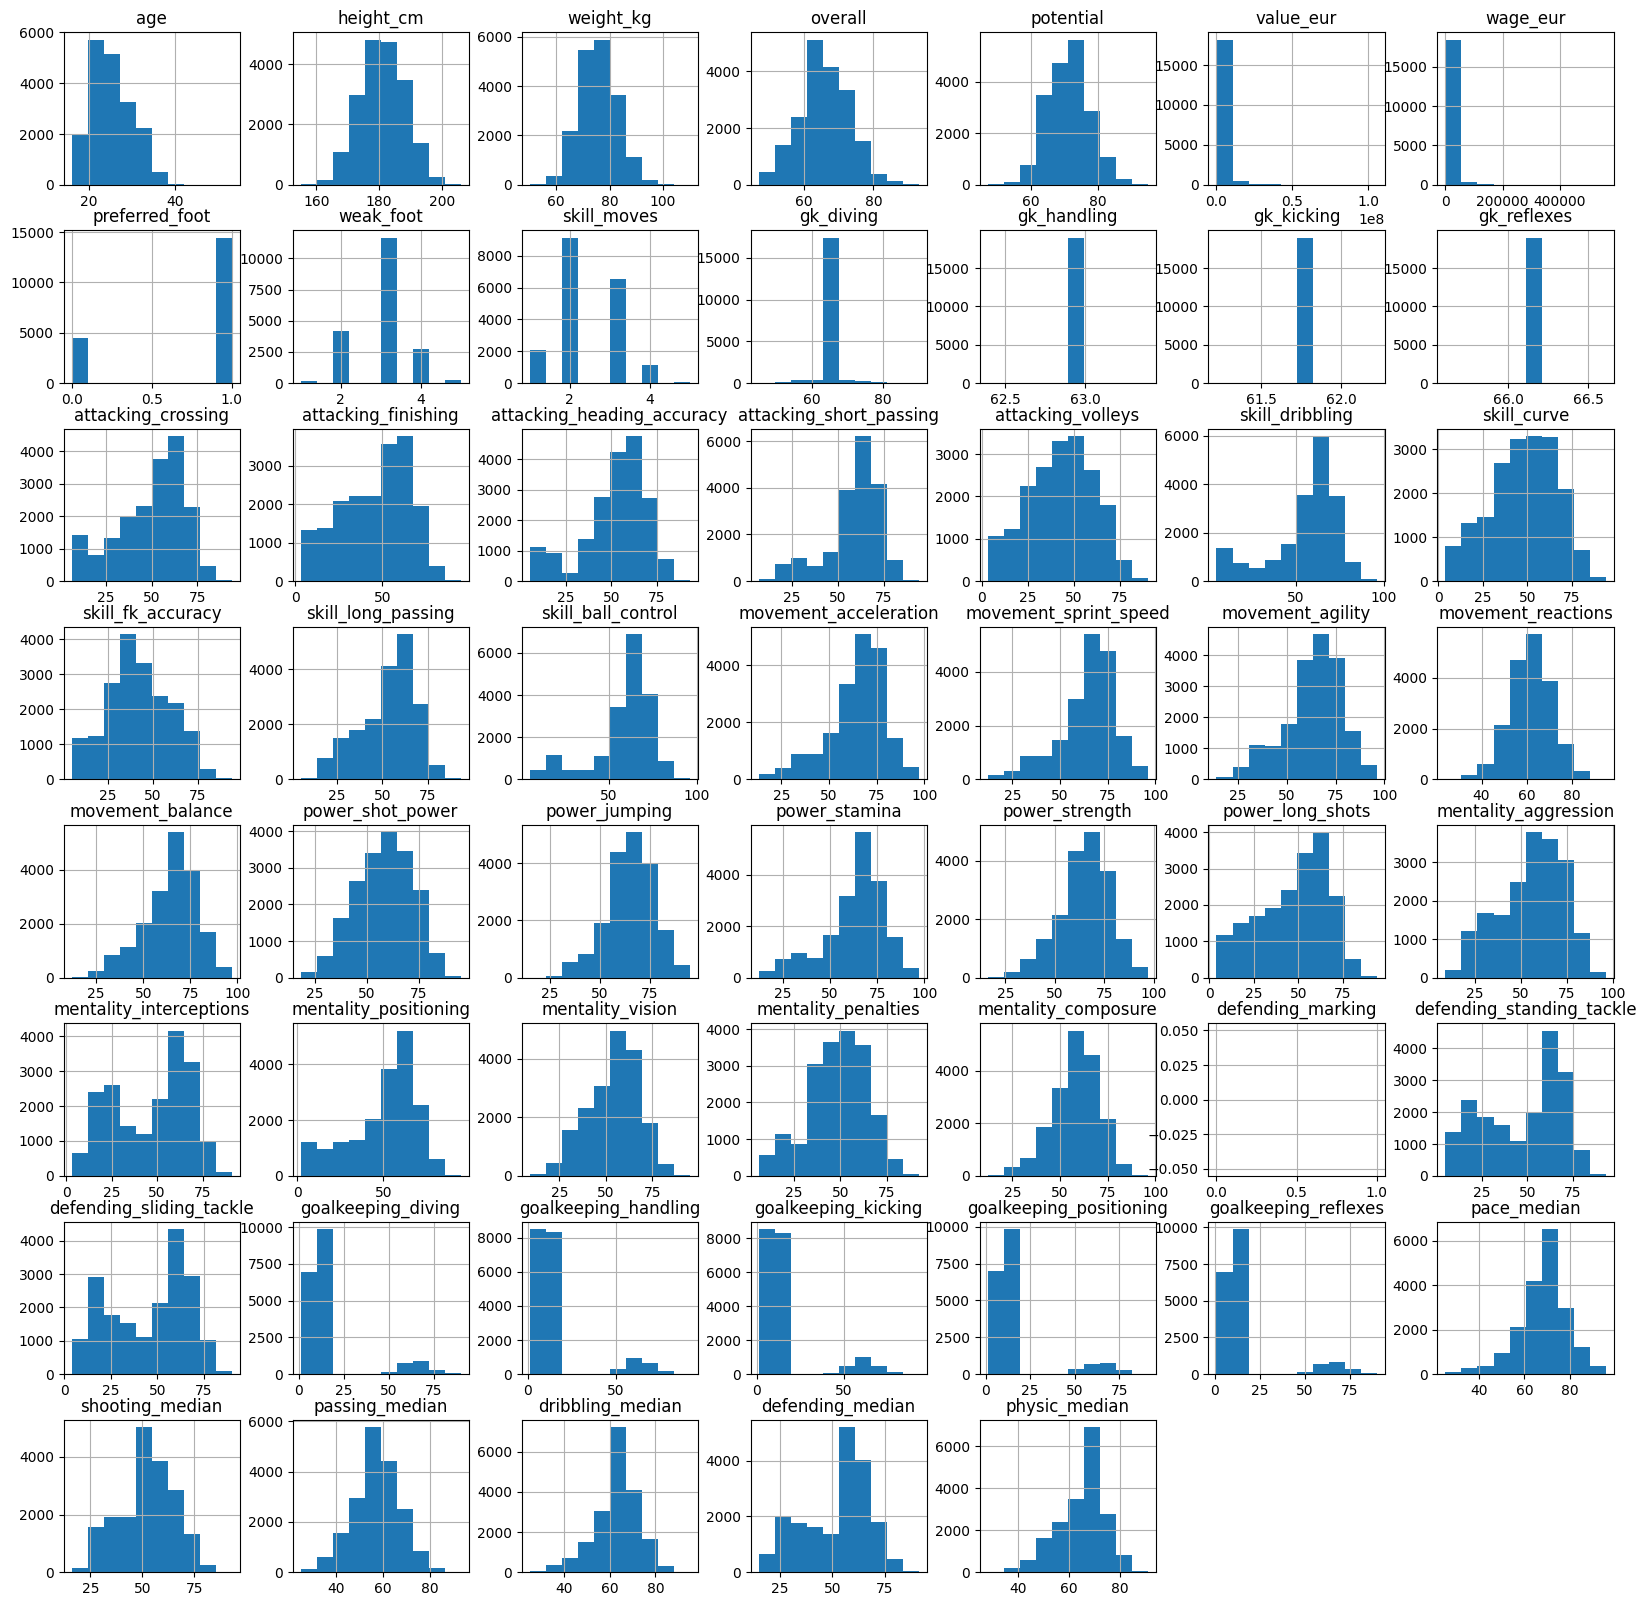

In [88]:
# let's explore the distribution of the numerical variables

data_fifa.hist(figsize=(20,20))
plt.show()

In [89]:
# so the transformation of categorical data is completed.
data_fifa = data_fifa.drop(['defending_marking'], axis=1)

#### So we have converted our data into computer understanable format. Next step is to transform our Data and scale it.

In [90]:
data_fifa.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate',
       'team_position', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeep

In [91]:
# Removing Constant features manually. These features dont provide any information to target feature. 
# These are redundant data available in dataset. 
data_fifa = data_fifa.drop(['gk_diving','gk_handling','gk_kicking','gk_reflexes'], axis=1)


In [121]:
data_fifa.to_csv("fifa_final.csv", index=False)

In [92]:
# lets move towards splitting the data.

# get the locations
y = data_fifa['overall']
X = data_fifa.drop(columns=['overall'], axis=1)

In [93]:
X.head()

,age,height_cm,weight_kg,potential,value_eur,wage_eur,preferred_foot,weak_foot,skill_moves,work_rate,...,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,pace_median,shooting_median,passing_median,dribbling_median,defending_median,physic_median
0,33,170,72,93,67500000,560000,0,4,4,Medium/Low,...,11,15,14,8,85.0,92.0,91.0,95.0,38.0,65.0
1,35,187,83,92,46000000,220000,1,4,5,High/Low,...,11,15,14,11,89.0,93.0,81.0,89.0,35.0,77.0
2,27,188,87,93,75000000,125000,1,3,1,Medium/Medium,...,92,78,90,90,68.0,54.0,58.0,64.0,56.0,66.0
3,31,184,80,91,80000000,240000,1,4,4,High/Medium,...,6,12,8,10,78.0,91.0,78.0,85.0,43.0,82.0
4,28,175,68,91,90000000,270000,1,5,5,High/Medium,...,9,15,15,11,91.0,85.0,86.0,94.0,36.0,59.0


In [94]:
y.head()

0    93
1    92
2    91
3    91
4    91
Name: overall, dtype: int64

In [95]:
X.columns

Index(['age', 'height_cm', 'weight_kg', 'potential', 'value_eur', 'wage_eur',
       'preferred_foot', 'weak_foot', 'skill_moves', 'work_rate',
       'team_position', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'pa

In [ ]:
# Performing feature selection for selecting best features for our model.
# If an independent feature is highly correlated with dependent feature, we don't need to remove it. 
# As it can play a crucial role.
# But if more than 2 or more independent features are highly correlated with each other. 
# Then what we can do is to keep only one of these features. They can behave a duplicate feature.

1. Train Test split
2. Feature Selection
3. Data Transformation
4. Model building

In [96]:
# create a column transformer with 3 types of transformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [97]:
X = preprocessor.fit_transform(X)

In [101]:
X.shape

(18944, 87)

In [102]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((15155, 87), (3789, 87))

In [103]:
print('len of X_train is :', len(X_train))
print('len of y_train is :', len(y_train))
print('len of X_test is :', len(X_test))
print('len of y_test is :',len(y_test))

len of X_train is : 15155
len of y_train is : 15155
len of X_test is : 3789
len of y_test is : 3789


#### Create an Evaluation function to give all metrics afte model training

In [106]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [112]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose = False),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test set
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("model performance for training dataset")
    print("- Root mean Sqared Error: {:.4f}".format(model_train_rmse))
    print("- mean absolute Error: {:.4f}".format(model_train_mae))
    print("- r2 score: {:.4f}".format(model_train_r2))
    r2_list.append(model_train_r2)

    print("-----------------------------------------------------")

    print("Model performace on test dataset")
    print("- Root mean Sqared Error: {:.4f}".format(model_test_rmse))
    print("- mean absolute Error: {:.4f}".format(model_test_mae))
    print("- r2 score: {:.4f}".format(model_test_r2))  
    r2_list.append(model_test_r2)


    print("="*35)
    print('\n')

Linear Regression
model performance for training dataset
- Root mean Sqared Error: 1.7278
- mean absolute Error: 1.3487
- r2 score: 0.9397
-----------------------------------------------------
Model performace on test dataset
- Root mean Sqared Error: 1.7184
- mean absolute Error: 1.3283
- r2 score: 0.9374


Lasso
model performance for training dataset
- Root mean Sqared Error: 2.7440
- mean absolute Error: 2.1632
- r2 score: 0.8479
-----------------------------------------------------
Model performace on test dataset
- Root mean Sqared Error: 2.7385
- mean absolute Error: 2.1425
- r2 score: 0.8409


Ridge
model performance for training dataset
- Root mean Sqared Error: 1.7278
- mean absolute Error: 1.3486
- r2 score: 0.9397
-----------------------------------------------------
Model performace on test dataset
- Root mean Sqared Error: 1.7185
- mean absolute Error: 1.3283
- r2 score: 0.9373


Random Forest Regressor
model performance for training dataset
- Root mean Sqared Error: 0.147

Step 1: fit the scaler on the TRAINING data
Step 2: use the scaler to transform the TRAINING data
Step 3: use the transformed training data to fit the predictive model
Step 4: use the scaler to transform the TEST data
Step 5: predict using the trained model (step 3) and the transformed TEST data (step 4).

In [113]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name','R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model Name,R2_Score
6,AdaBoost Regressor,0.999561
4,XGBRegressor,0.939692
0,Linear Regression,0.939690
1,Lasso,0.937351
5,CatBoosting Regressor,0.937344
2,Ridge,0.847892
3,Random Forest Regressor,0.840891


# Linear Regression

In [114]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 93.74


# Plot y_pred and y_test

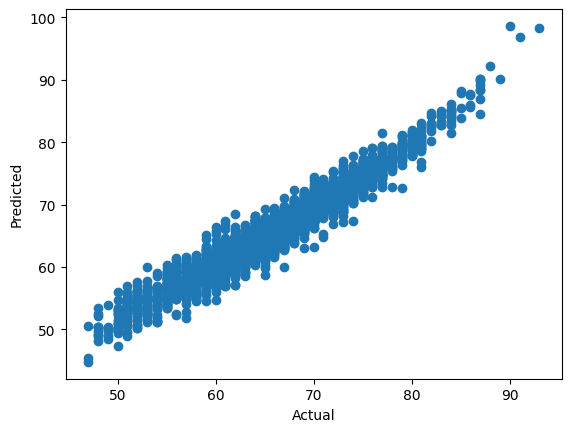

In [115]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='overall'>

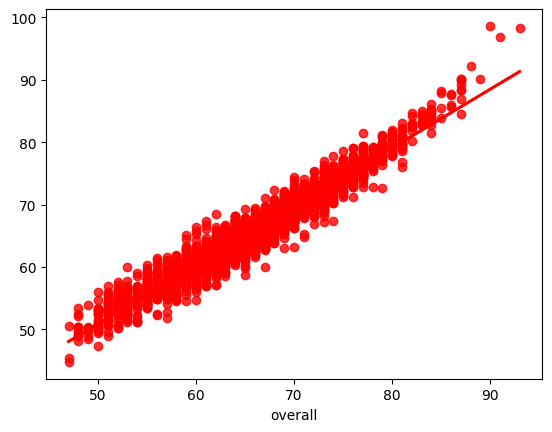

In [118]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

# Difference between Actual and Predicted Values

In [120]:
pred_df = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
15024,60,59.483765,0.516235
11771,64,61.804565,2.195435
16615,58,57.186401,0.813599
4201,71,70.982666,0.017334
13480,62,62.880493,-0.880493
...,...,...,...
8404,67,67.457031,-0.457031
5412,69,69.706299,-0.706299
3755,72,70.902100,1.097900
11886,63,63.326172,-0.326172
